# Starter Code

In [1]:
# although we standardize X and y variables on input,
# we will fit the intercept term in the models
# Expect fitted values to be close to zero
SET_FIT_INTERCEPT = True

# import base packages into the namespace for this program
import numpy as np
import pandas as pd

In [2]:
# modeling routines from Scikit Learn packages
import sklearn.linear_model 
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score  
from math import sqrt  # for root mean-squared error calculation
from sklearn.model_selection import cross_val_score, cross_val_predict, train_test_split

In [3]:
# read data for the Boston Housing Study
# creating data frame restdata
boston_input = pd.read_csv('boston.csv')

In [4]:
# check the pandas DataFrame object boston_input
print('\nboston DataFrame (first and last five rows):')
print(boston_input.head())
print(boston_input.tail())

print('\nGeneral description of the boston_input DataFrame:')
print(boston_input.info())


boston DataFrame (first and last five rows):
  neighborhood     crim    zn  indus  chas    nox  rooms   age     dis  rad  \
0       Nahant  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1   
1   Swampscott  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2   
2   Swanpscott  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2   
3   Marblehead  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3   
4   Marblehead  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3   

   tax  ptratio  lstat    mv  
0  296     15.3   4.98  24.0  
1  242     17.8   9.14  21.6  
2  242     17.8   4.03  34.7  
3  222     18.7   2.94  33.4  
4  222     18.7   5.33  36.2  
    neighborhood     crim   zn  indus  chas    nox  rooms   age     dis  rad  \
501     Winthrop  0.06263  0.0  11.93     0  0.573  6.593  69.1  2.4786    1   
502     Winthrop  0.04527  0.0  11.93     0  0.573  6.120  76.7  2.2875    1   
503     Winthrop  0.06076  0.0  11.93     0  0.573  6

In [5]:
# drop neighborhood from the data being considered
boston = boston_input.drop('neighborhood', 1)
print('\nGeneral description of the boston DataFrame:')
print(boston.info())

print('\nDescriptive statistics of the boston DataFrame:')
print(boston.describe())



General description of the boston DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
crim       506 non-null float64
zn         506 non-null float64
indus      506 non-null float64
chas       506 non-null int64
nox        506 non-null float64
rooms      506 non-null float64
age        506 non-null float64
dis        506 non-null float64
rad        506 non-null int64
tax        506 non-null int64
ptratio    506 non-null float64
lstat      506 non-null float64
mv         506 non-null float64
dtypes: float64(10), int64(3)
memory usage: 51.5 KB
None

Descriptive statistics of the boston DataFrame:
             crim          zn       indus        chas         nox       rooms  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      

In [6]:
# set up preliminary data for data for fitting the models 
# the first column is the median housing value response
# the remaining columns are the explanatory variables
prelim_model_data = np.array([boston.mv,\
    boston.crim,\
    boston.zn,\
    boston.indus,\
    boston.chas,\
    boston.nox,\
    boston.rooms,\
    boston.age,\
    boston.dis,\
    boston.rad,\
    boston.tax,\
    boston.ptratio,\
    boston.lstat]).T

# dimensions of the polynomial model X input and y response
# preliminary data before standardization
print('\nData dimensions:', prelim_model_data.shape)


Data dimensions: (506, 13)


In [7]:
# standard scores for the columns... along axis 0
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
print(scaler.fit(prelim_model_data))
# show standardization constants being employed
print(scaler.mean_)
print(scaler.scale_)

StandardScaler(copy=True, with_mean=True, with_std=True)
[2.25288538e+01 3.61352356e+00 1.13636364e+01 1.11367787e+01
 6.91699605e-02 5.54695059e-01 6.28463439e+00 6.85749012e+01
 3.79504269e+00 9.54940711e+00 4.08237154e+02 1.84555336e+01
 1.26530632e+01]
[9.17309810e+00 8.59304135e+00 2.32993957e+01 6.85357058e+00
 2.53742935e-01 1.15763115e-01 7.01922514e-01 2.81210326e+01
 2.10362836e+00 8.69865112e+00 1.68370495e+02 2.16280519e+00
 7.13400164e+00]


In [8]:
# the model data will be standardized form of preliminary model data
model_data = scaler.fit_transform(prelim_model_data)

# dimensions of the polynomial model X input and y response
# all in standardized units of measure
print('\nDimensions for model_data:', model_data.shape)


Dimensions for model_data: (506, 13)


# Data Analysis

In [9]:
#look at original dataframe without neighborhood
import matplotlib.pyplot as plt
import seaborn as sns

boston.head()

,crim,zn,indus,chas,nox,rooms,age,dis,rad,tax,ptratio,lstat,mv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


In [10]:
boston.isna().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rooms      0
age        0
dis        0
rad        0
tax        0
ptratio    0
lstat      0
mv         0
dtype: int64

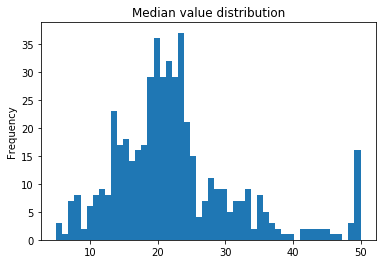

In [32]:
#median value distribution
boston['mv'].plot.hist(bins = 50)
plt.title('Median value distribution')
plt.savefig('Median Value Distribution.pdf', 
    bbox_inches = 'tight', dpi=None, facecolor='w', edgecolor='b', 
    orientation='portrait', papertype=None, format=None, 
    transparent=True, pad_inches=0.25, frameon=None)
plt.show()

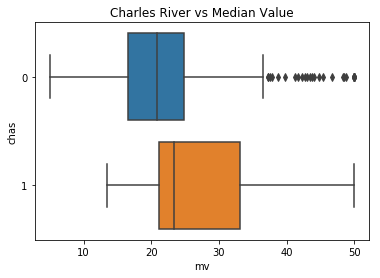

In [31]:
#does being by the river matter?
sns.boxplot(x='mv',y='chas',data = boston, orient = 'h')
plt.title('Charles River vs Median Value')
plt.savefig('Charles River vs Median Value.pdf', 
    bbox_inches = 'tight', dpi=None, facecolor='w', edgecolor='b', 
    orientation='portrait', papertype=None, format=None, 
    transparent=True, pad_inches=0.25, frameon=None)
plt.show()

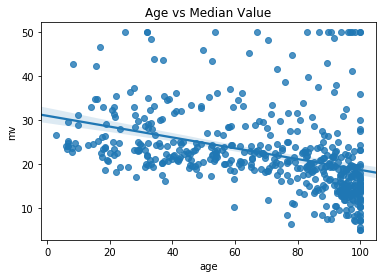

In [30]:
#compare median value to age
sns.regplot(x='age', y='mv', data = boston)
plt.title('Age vs Median Value')
plt.savefig('Age vs Median Value.pdf', 
    bbox_inches = 'tight', dpi=None, facecolor='w', edgecolor='b', 
    orientation='portrait', papertype=None, format=None, 
    transparent=True, pad_inches=0.25, frameon=None)
plt.show()

# Build Model Basics

In [14]:
#define X and y
X = prelim_model_data[:,1:13]
y = prelim_model_data[:,:1]

Xs = model_data[:,1:13]
ys = model_data[:,:1]

# seed value for random number generators to obtain reproducible results
RANDOM_SEED = 42

#train test split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = RANDOM_SEED)
Xs_train, Xs_test, ys_train, ys_test = train_test_split(Xs, ys, test_size = 0.2, random_state = RANDOM_SEED)

In [36]:
#Cross validation function
#a, b are start and end of range for # of folds
#x, y are the data
def crossval(model, x, y, a, b):
    for i in range(a,b):
        validate = cross_val_score(model, x, y, cv = i)
        print(validate)
      

#learning curves
def learning_curve(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=RANDOM_SEED)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))

    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.legend(loc="upper right", fontsize=14)   # not shown in the book
    plt.xlabel("Training set size", fontsize=14) # not shown
    plt.ylabel("RMSE", fontsize=14)              # not shown
    

def prediction (model, X, y): #x and y values are test data sets
    predict = model.predict(X)
    mse = mean_squared_error(y, predict)
    rmse = sqrt(mse)
    print('MSE: {:.3f}'.format(mse))
    print('RMSE: {:.3f}'.format(rmse))

# Linear Regression

In [16]:
lr = LinearRegression()

lr.fit(X,y)

print('Training set R-squared: {:.3f}'.format(lr.score(X_train, y_train)))
print('Test set R-squared: {:.3f}'.format(lr.score(X_test, y_test)))

Training set R-squared: 0.742
Test set R-squared: 0.714


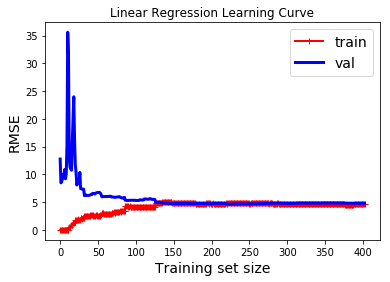

In [37]:
learning_curve(lr, X, y)
plt.title('Linear Regression Learning Curve')
plt.savefig('Linear Rgression Learning Curve.pdf', 
    bbox_inches = 'tight', dpi=None, facecolor='w', edgecolor='b', 
    orientation='portrait', papertype=None, format=None, 
    transparent=True, pad_inches=0.25, frameon=None)
plt.show()

In [18]:
#Cross validation function
#a, b are start and end of range for # of folds
#x, y are the data
def crossval(model, x, y, a, b):
    for i in range(a,b):
        validate = cross_val_score(model, x, y, cv = i)
        print(validate)

#look at cross validation scores for different numbers of folds
crossval(lr, X_train, y_train, 3, 15) 


[0.72136089 0.75176196 0.70230126]
[0.73117127 0.69207728 0.77736846 0.68873872]
[0.76424889 0.62562764 0.76660305 0.78332004 0.66975619]
[0.77449261 0.60577781 0.78085782 0.7771276  0.72271162 0.67392423]
[0.773094   0.71062793 0.58497927 0.75326308 0.79047    0.7204736
 0.61376976]
[0.76030826 0.7194221  0.59197673 0.7928533  0.7592457  0.79266005
 0.73614334 0.59641211]
[0.73429739 0.7282858  0.68564304 0.61826543 0.71584417 0.80161703
 0.74771845 0.73168173 0.57941989]
[0.7544646  0.7913731  0.74038292 0.33179797 0.78852831 0.73320392
 0.82777123 0.67359915 0.76494136 0.54870555]
[0.77768599 0.79586397 0.7062323  0.49801074 0.77535547 0.77553761
 0.77056123 0.78269365 0.72900181 0.76682491 0.55804641]
[0.7677332  0.80612832 0.65516575 0.54269118 0.72695446 0.79002984
 0.72991567 0.81469611 0.75675726 0.68961608 0.80096434 0.55580485]
[0.81459369 0.71732286 0.70250955 0.78203735 0.18515147 0.77442211
 0.82160772 0.64273663 0.82246815 0.57181663 0.72291338 0.77137896
 0.56638864]
[0.

In [21]:
print('Raw data predictions:')
prediction(lr, X_test, y_test)

print(' ')

print('Standard Scale predictions:')
prediction(lr, Xs_test, ys_test)

Raw data predictions:
MSE: 22.976
RMSE: 4.793
 
Standard Scale predictions:
MSE: 1662.783
RMSE: 40.777


# Ridge Regression

In [22]:
#fit Ridge model

r = Ridge()

r.fit(X_train, y_train)
print('Training set R-squared: {:.3f}'.format(r.score(X_train, y_train)))
print('Test set R-squared: {:.3f}'.format(r.score(X_test, y_test)))

Training set R-squared: 0.742
Test set R-squared: 0.685


In [23]:
#test different alpha values

alpha = [10, 1, .1, .01, .001]
ridge_train = []
for i in alpha:
    t = Ridge(alpha = i).fit(X_train, y_train)
    t_score = t.score(X_train, y_train)
    ridge_train.append(t_score)
    

In [24]:
ridge_train

[0.7347155757213986,
 0.7423798478893033,
 0.7446115674256046,
 0.7446743028493684,
 0.7446750236478235]

In [39]:
#produce new r-square values with updated alpha
#slight improvement on r-square
r = Ridge(alpha = 10)
r.fit(X_train, y_train)

print('Training set R-squared: {:.3f}'.format(r.score(X_train, y_train)))
print('Test set R-squared: {:.3f}'.format(r.score(X_test, y_test)))

Training set R-squared: 0.735
Test set R-squared: 0.681


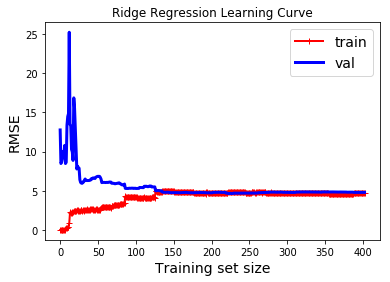

In [38]:
learning_curve(r, X, y)
plt.title('Ridge Regression Learning Curve')
plt.savefig('Ridge Regression Learning Curve.pdf', 
    bbox_inches = 'tight', dpi=None, facecolor='w', edgecolor='b', 
    orientation='portrait', papertype=None, format=None, 
    transparent=True, pad_inches=0.25, frameon=None)
plt.show()

In [27]:
crossval(r, X_train, y_train, 3, 15)

[0.72005779 0.7537159  0.7010662 ]
[0.72909593 0.69349127 0.77716475 0.68828449]
[0.76282031 0.62534534 0.76720086 0.78343563 0.66926394]
[0.77321343 0.60455865 0.78420181 0.7774388  0.72145577 0.67372911]
[0.77141508 0.70998977 0.58625998 0.75266452 0.79182037 0.71984213
 0.61358627]
[0.75806063 0.71883658 0.59156153 0.79530985 0.75871227 0.79291439
 0.73525387 0.59619658]
[0.73200022 0.72733375 0.68552548 0.62295752 0.71440429 0.80298556
 0.74712602 0.73002872 0.57933492]
[0.75308065 0.79044895 0.74053231 0.33128615 0.7906178  0.73233547
 0.82846444 0.67328009 0.76345983 0.54891443]
[0.77586602 0.79514433 0.70542375 0.49732459 0.78191245 0.77449546
 0.77107817 0.78291122 0.72798529 0.76582206 0.55840629]
[0.76597799 0.80607581 0.65367995 0.5418308  0.73286641 0.79090584
 0.7286229  0.81648827 0.75548031 0.68854565 0.80043623 0.55578785]
[0.8109316  0.71899949 0.70160994 0.78326845 0.18304001 0.78103284
 0.82103616 0.64160783 0.82293745 0.57350895 0.72137787 0.77069644
 0.5661386 ]
[0

In [40]:
#Ridge regression prediction
print('Raw data predictions:')
prediction(r, X_test, y_test)

print(' ')

print('Standard Scale predictions:')
prediction(r, Xs_test, ys_test)

Raw data predictions:
MSE: 23.551
RMSE: 4.853
 
Standard Scale predictions:
MSE: 790.828
RMSE: 28.122


# Does Gradient Boosting improve the model?

In [35]:
from sklearn.ensemble import GradientBoostingRegressor

params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'ls'}
gbr = GradientBoostingRegressor(**params)

gbr.fit(X_train, y_train.ravel())

print('Raw data predictions:')
prediction(gbr, X_test, y_test)

print(' ')

print('Standard Scale predictions:')
prediction(gbr, Xs_test, ys_test)

Raw data predictions:
MSE: 6.684
RMSE: 2.585
 
Standard Scale predictions:
MSE: 2194.911
RMSE: 46.850
